<a href="https://colab.research.google.com/github/aimee-annabelle/Probability_distribution_ML_assignment/blob/main/Probability_distribution_ML_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using a relevant Question and Real-world Example Implement the distribution formula using Numpy Only and visualize them with Matplotlib.


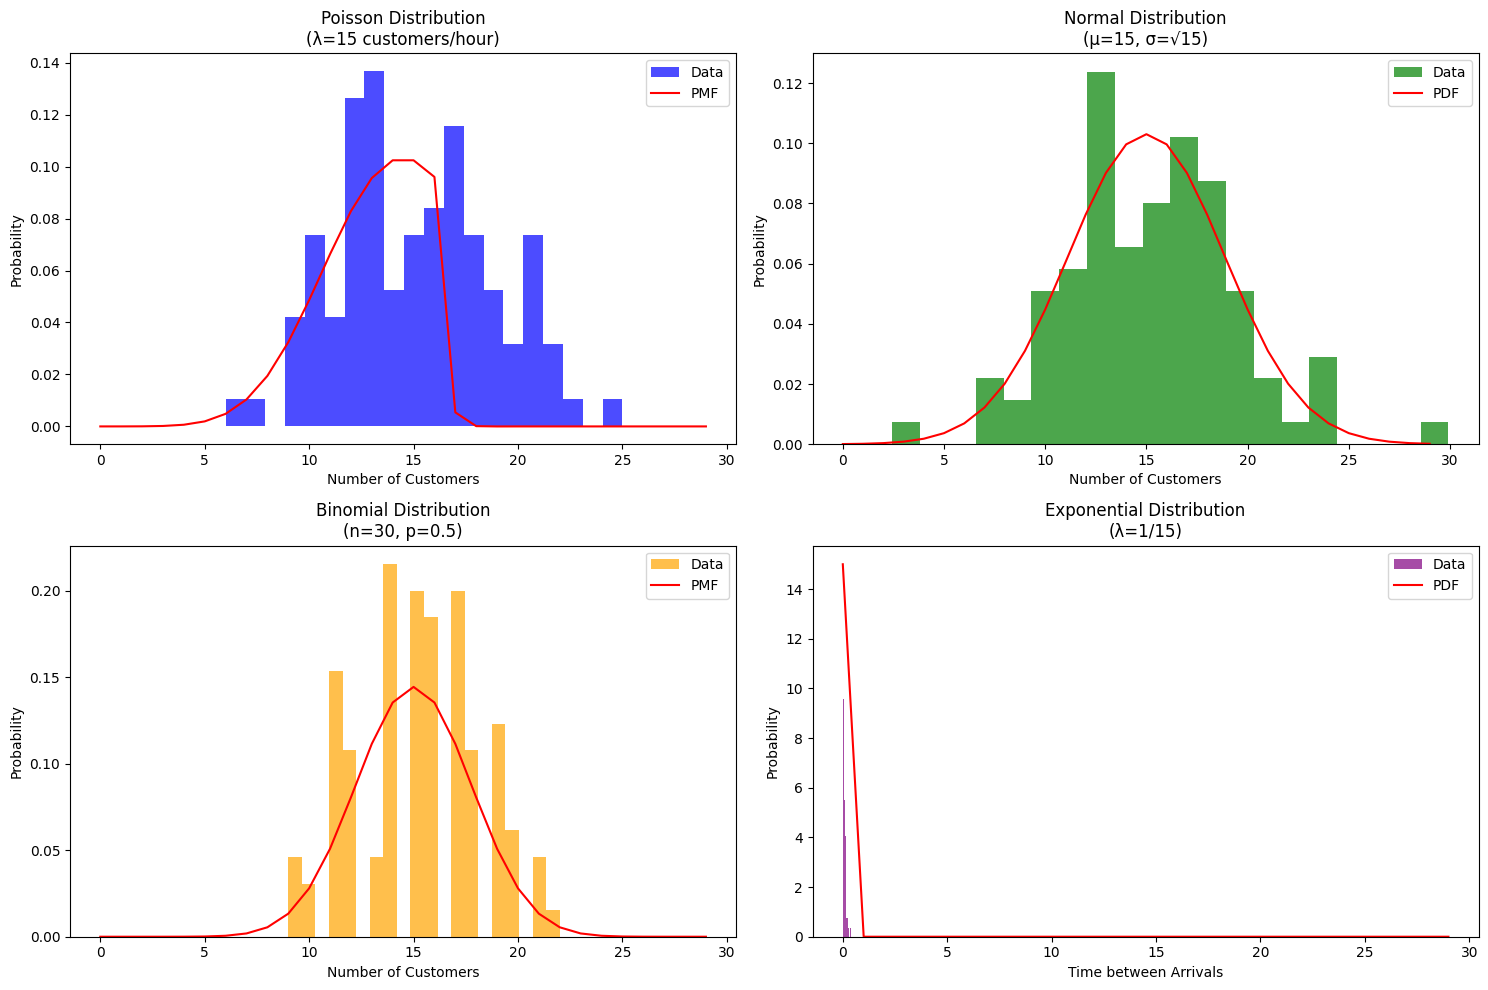

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Set random seed for reproducibility
np.random.seed(42)

# Example: Customer arrivals at a coffee shop per hour
lambda_param = 15  # Average 15 customers per hour
hours = 100
x = np.arange(0, 30)  # Range for plotting

# Generate distributions
poisson_dist = np.random.poisson(lambda_param, hours)
normal_dist = np.random.normal(lambda_param, np.sqrt(lambda_param), hours)
binomial_dist = np.random.binomial(30, lambda_param/30, hours)
exponential_dist = np.random.exponential(1/lambda_param, hours)

# Create subplots
plt.figure(figsize=(15, 10))

# Poisson Distribution
plt.subplot(2, 2, 1)
plt.hist(poisson_dist, bins=20, density=True, alpha=0.7, color='blue', label='Data')
plt.plot(x, np.exp(-lambda_param) * lambda_param**x / np.array([math.factorial(i) for i in x]), 
         'r-', label='PMF')
plt.title('Poisson Distribution\n(λ=15 customers/hour)')
plt.xlabel('Number of Customers')
plt.ylabel('Probability')
plt.legend()

# Normal Distribution
plt.subplot(2, 2, 2)
plt.hist(normal_dist, bins=20, density=True, alpha=0.7, color='green', label='Data')
plt.plot(x, 1/(np.sqrt(2*np.pi*lambda_param)) * 
         np.exp(-(x-lambda_param)**2/(2*lambda_param)), 'r-', label='PDF')
plt.title('Normal Distribution\n(μ=15, σ=√15)')
plt.xlabel('Number of Customers')
plt.ylabel('Probability')
plt.legend()

# Binomial Distribution
plt.subplot(2, 2, 3)
plt.hist(binomial_dist, bins=20, density=True, alpha=0.7, color='orange', label='Data')
n, p = 30, lambda_param/30
plt.plot(x, [math.comb(n, k) * (p**k) * ((1-p)**(n-k)) for k in x], 'r-', label='PMF')
plt.title('Binomial Distribution\n(n=30, p=0.5)')
plt.xlabel('Number of Customers')
plt.ylabel('Probability')
plt.legend()

# Exponential Distribution
plt.subplot(2, 2, 4)
plt.hist(exponential_dist, bins=20, density=True, alpha=0.7, color='purple', label='Data')
plt.plot(x, lambda_param * np.exp(-lambda_param*x), 'r-', label='PDF')
plt.title('Exponential Distribution\n(λ=1/15)')
plt.xlabel('Time between Arrivals')
plt.ylabel('Probability')
plt.legend()

plt.tight_layout()
plt.show()